In [7]:
import sys
import matplotlib
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axis
from matplotlib.patches import Ellipse
import scipy
import numpy as np
from numpy import *
import math
import pylab
import random
from pylab import *
from astropy.coordinates import SkyCoord
from astropy import units as u
import pylab as P
from astropy.io import ascii
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

matplotlib.style.use('ggplot')

sns.set_style('darkgrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

### Now we read in the data

In [8]:
dat4=ascii.read("Leo4_lisp_rod_sdss_ppmxl",data_start=2)
dat5=ascii.read("Leo5_lisp_rod_sdss_ppmxl",data_start=2)
datB=ascii.read("LeoB_lisp_rod_sdss_ppmxl",data_start=2)

### Now we define variables

In [10]:
vhc4 = dat4['Vhel']
verr4 = dat4['Verr']
Radeg4=dat4['RA']
Decdeg4=dat4['DEC']

vhc5 = dat5['Vhel']
verr5 = dat5['Verr']
Radeg5=dat5['RA']
Decdeg5=dat5['DEC']

vhcB = datB['Vhel']
verrB = datB['Verr']
RadegB=datB['RA']
DecdegB=datB['DEC']

### Now we explore

In [4]:
np.max(vhc4)

282.75069999999999

In [11]:
np.mean(vhc4)

89.990328143712574

### Where are we pointed in the sky?

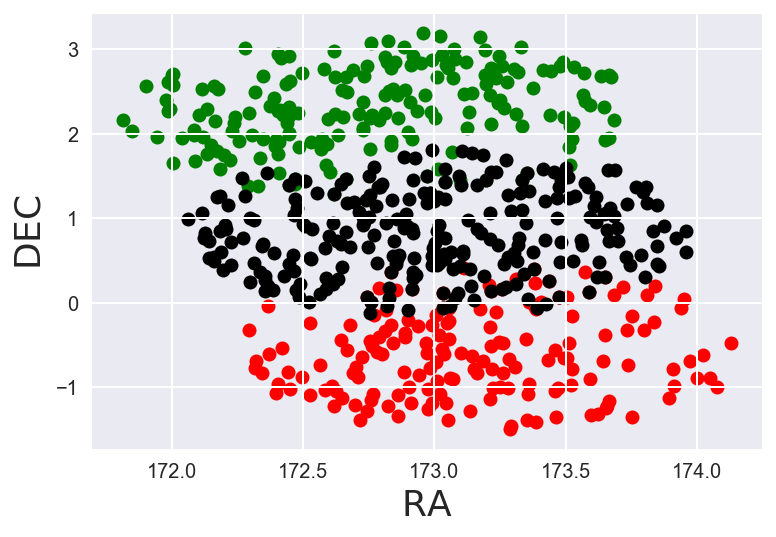

In [12]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4,Decdeg4,'or',label='Leo4',zorder=-1)
ax.plot(Radeg5,Decdeg5,'og',label='Leo5',zorder=-1)
ax.plot(RadegB,DecdegB,'ok',label='LeoB',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{DEC}$',fontsize=18)
#ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

### How about velocity space?

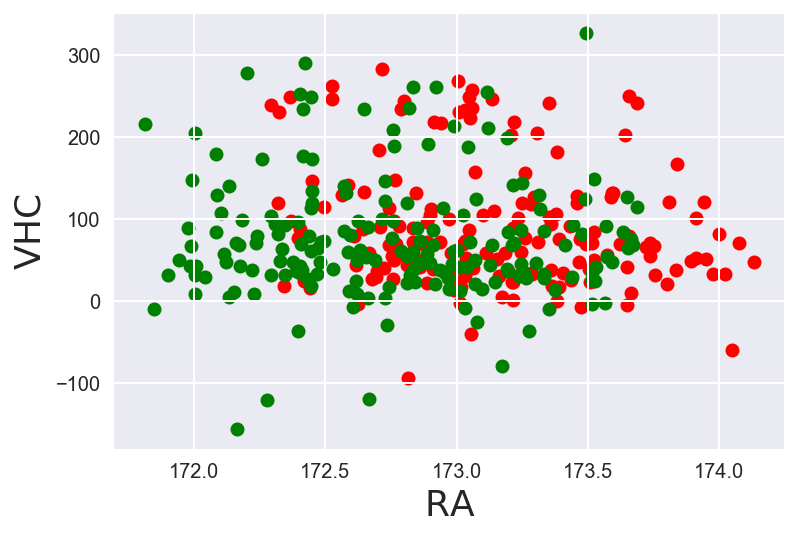

In [25]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4,vhc4,'or',label='Leo4',zorder=-1)
ax.plot(Radeg5,vhc5,'og',label='Leo5',zorder=-1)
#ax.plot(RadegB,vhcB,'ok',label='LeoB',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{VHC}$',fontsize=18)
#ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

### This group looks velocities that are above 200 VHC are their own group

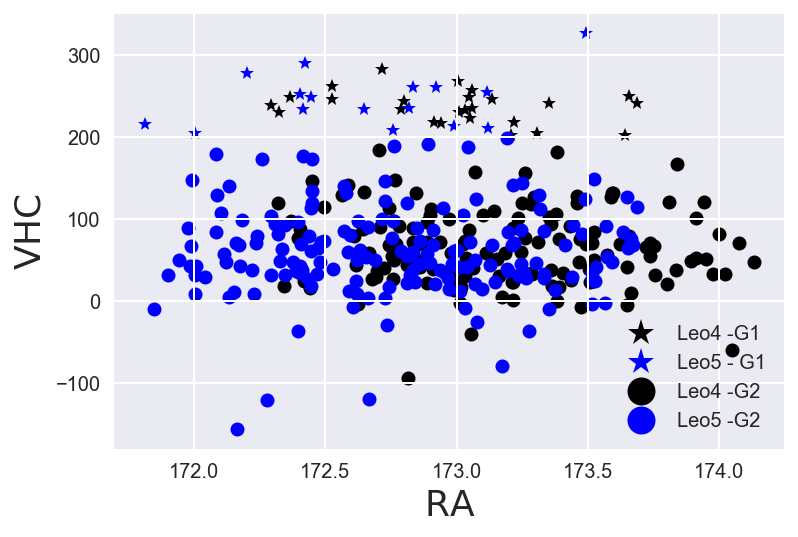

In [58]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4[vhc4 >= 200.0],vhc4[vhc4 >= 200.0],'*k',label='Leo4 -G1',zorder=-1)
ax.plot(Radeg5[vhc5 >= 200.0],vhc5[vhc5 >= 200.0],'*b',label='Leo5 - G1',zorder=-1)
ax.plot(Radeg4[vhc4 < 200.0],vhc4[vhc4 < 200.0],'ok',label='Leo4 -G2',zorder=-1)
ax.plot(Radeg5[vhc5 < 200.0],vhc5[vhc5 < 200.0],'ob',label='Leo5 -G2',zorder=-1)

#ax.plot(RadegB,vhcB,'ok',label='LeoB',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{VHC}$',fontsize=18)
ax.legend(markerscale=(2), loc=4, numpoints=1)
plt.show()

### It looks like Leo4 and Leo 5 divide up

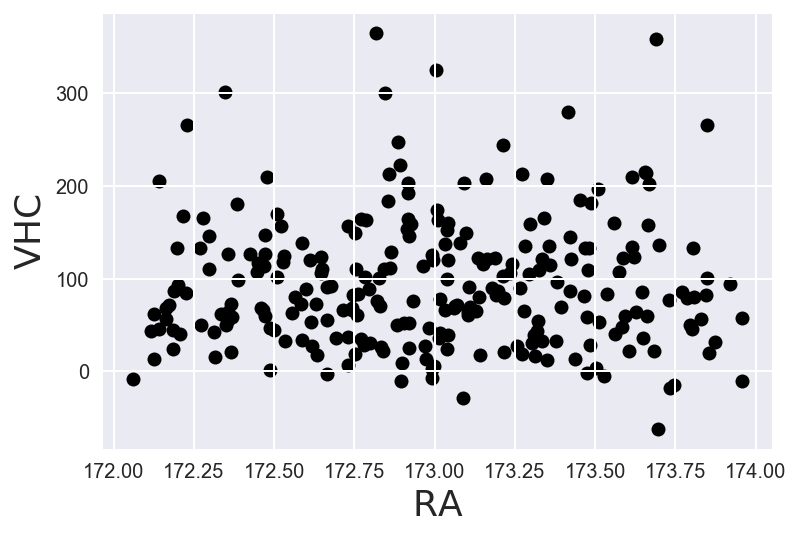

In [26]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
#ax.plot(Radeg4,vhc4,'or',label='Leo4',zorder=-1)
#ax.plot(Radeg5,vhc5,'og',label='Leo5',zorder=-1)
ax.plot(RadegB,vhcB,'ok',label='LeoB',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{VHC}$',fontsize=18)
#ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

### Leo B does not seem to have more than one population

### Let's use some better visuals

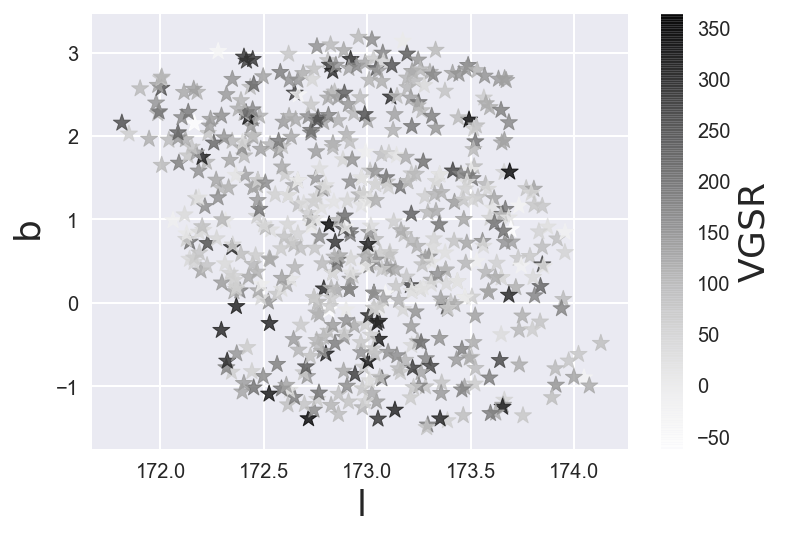

In [24]:
fig2=plt.figure(2)
ax=fig2.add_subplot(111)
plt.scatter(Radeg4,Decdeg4,marker='*',s=80,c=vhc4,label='Leo4', alpha=0.8)
plt.scatter(Radeg5,Decdeg5,marker='*',s=80,c=vhc5,label='Leo5', alpha=0.8)
plt.scatter(RadegB,DecdegB,marker='*',s=80,c=vhcB,label='Leo4.5', alpha=0.8)
cbar=plt.colorbar()
cbar.set_label(r'$\mathrm{VGSR}$',fontsize=18)
ax.set_xlabel(r'$\mathrm{l}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{b}$',fontsize=18)
plt.show()

### We would like work with Pandas Dataframes
#### We expect them to be easier to plot and easier to work with

In [37]:
df4=pd.DataFrame({}, dtype=float)
df4['Ra']=Radeg4
df4['Dec']=Decdeg4
df4['V']=vhc4
df4['type']='4'

df5=pd.DataFrame({}, dtype=float)
df5['Ra']=Radeg5
df5['Dec']=Decdeg5
df5['V']=vhc5
df5['type']='5'

dfb=pd.DataFrame({}, dtype=float)
dfb['Ra']=RadegB
dfb['Dec']=DecdegB
dfb['V']=vhcB
dfb['type']='0'

#Look at how easy it is to describe our data
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Ra,167.0,173.145054,0.435742,172.294416,172.813573,173.101125,173.461591,174.130467
Dec,167.0,-0.594130,0.489895,-1.491850,-0.994701,-0.638332,-0.222024,0.413713
V,167.0,89.990328,75.357660,-95.036900,35.143500,70.703700,120.470550,282.750700


In [38]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Ra,190.0,172.767223,0.479464,171.813191,172.404663,172.757018,173.131208,173.685525
Dec,190.0,2.291583,0.460383,1.289688,1.949530,2.272166,2.680670,3.184943
V,190.0,74.992600,74.214644,-156.468900,31.477000,61.505100,102.387025,325.790900


### This is much easier than using numpy

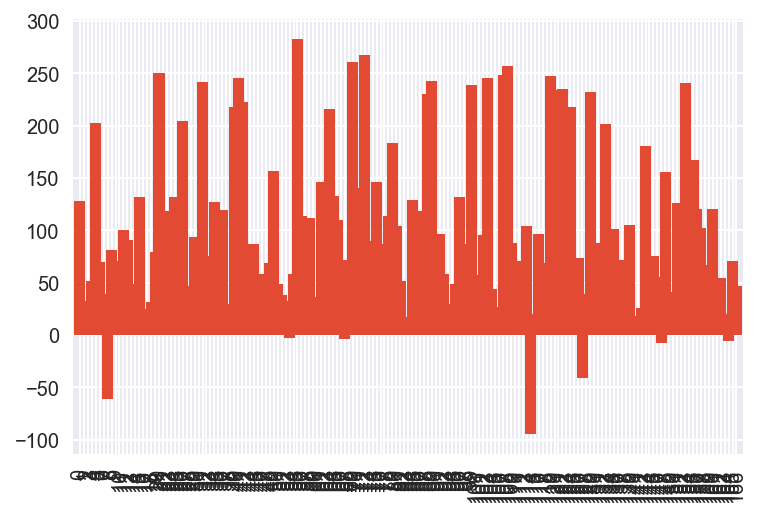

In [48]:
df4['V'].plot(kind='bar', width=2.8)

### This could look better

#### Let's get our Pandas into order

### Use one big dataframe and look at everything

In [40]:
dfall=pd.concat([df4, df5, dfb], ignore_index=True)
dfall.describe().T
group=dfall.groupby(['type'])
group.mean()

,Ra,Dec,V
type,,,
0,172.992299,0.813037,94.555554
4,173.145054,-0.594130,89.990328
5,172.767223,2.291583,74.992600


In [42]:
#if there are any null values it will cause us problems
dfall.isnull().sum()

Ra      0
Dec     0
V       0
type    0
dtype: int64

#### We have no null values, our data is good

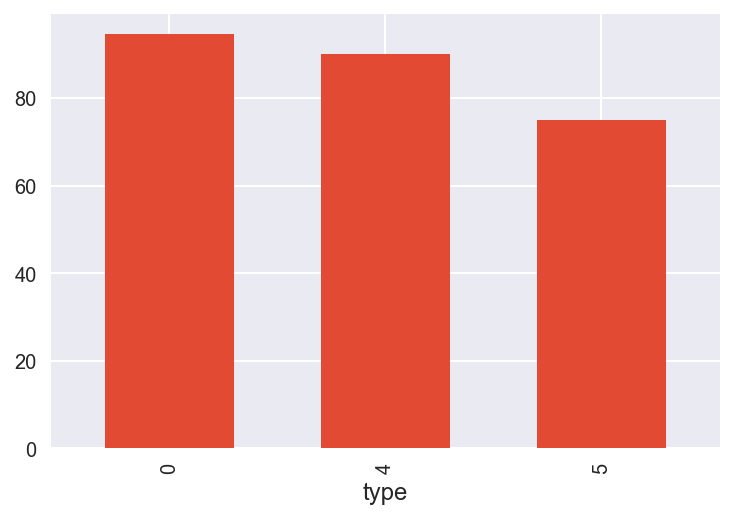

In [49]:
dfall.groupby(['type'])['V'].mean().plot(kind='bar', width=0.6)

### This looks much better, it makes more sense to group this way

### Let's start thinking about Machine Learning

#### Can we group by velocity to see different behavior?

#### If the groups we saw  (above 200 km/s in velocity) were real, we can look for them

### Let's try CLASSIFICATION

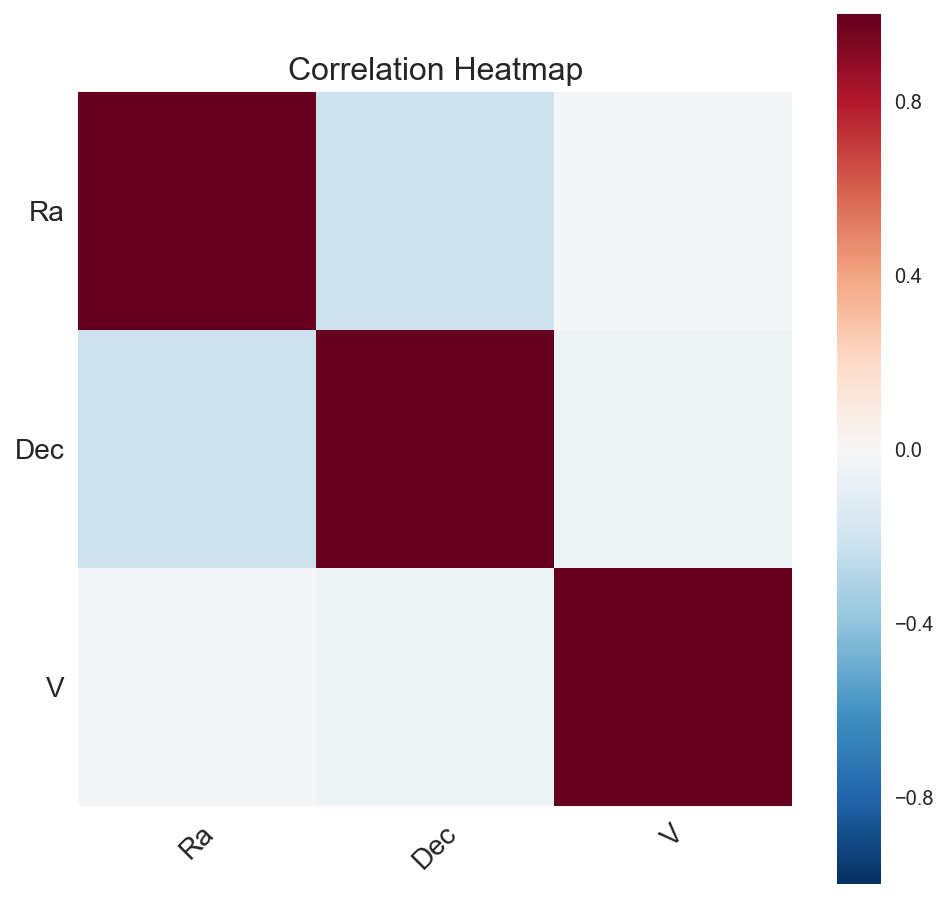

In [51]:
#Get set up, check variable correlation with seaborn plotting
corr = dfall.corr()

f, ax = plt.subplots(figsize=(8, 8))

ax = sns.heatmap(data=corr, square=True, ax=ax)
plt.title('Correlation Heatmap',size=16)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
plt.show()

### This looks good because the colors are not too dark

### Set up Machine Learning

In [65]:
Xk = dfall[[c for c in dfall.columns if not c in ['V', 'Type']]]
#X = dfall.V.values.astype(float)
yk = dfall.V.values.astype(float)

In [66]:
knn = KNeighborsClassifier(n_neighbors=3)

In [69]:
ss = StandardScaler()
Xs = ss.fit_transform(Xk)

In [70]:
#scores = cross_val_score(knn, Xs, yk, cv=10)
#print(scores)
#print(np.mean(scores))
#Xsx = ss.fit_transform(X)